In [30]:
### Importing impotant libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
titanic=pd.read_csv("E://Datasets//Miscellaneous//Titanic//train.csv",usecols=['Age','Fare','Survived'])
titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### ALL Techniques Handling Missing values.

1) Mean,Meadian,Mode
2) Random Sample Imputation.
3) Capturing NAN values with new feature.
4) End of Distribution Imputation.
5) Arbitrary Imputation.
6) Frequent Category Imputation.

### 1) Mean Meadian Mode Imputation.

### When we used Mean/Meadin/Mode? 
Mean median imputation has the assumption the data ae misssing completly as random.we replacing NaN with most frequent occurance.


In [32]:
## Calculating % of missing values.
titanic.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [39]:
### Creating NAN fnunction.
def impute_nan(titanic,variable,median):
    titanic[variable+'_median']=titanic[variable].fillna(median)

In [40]:
median=titanic.Age.median()
median

28.0

In [35]:
titanic['Age_mean']=titanic.Age.mean()
mean

29.69911764705882

In [41]:
impute_nan(titanic,'Age',median)

In [37]:
impute_nan(titanic,'Age',mean)

In [42]:
titanic.head(10)

,Survived,Age,Fare,Age_mean,Age_median
0,0,22.0,7.2500,29.699118,22.0
1,1,38.0,71.2833,29.699118,38.0
2,1,26.0,7.9250,29.699118,26.0
3,1,35.0,53.1000,29.699118,35.0
4,0,35.0,8.0500,29.699118,35.0
5,0,NaN,8.4583,29.699118,28.0
6,0,54.0,51.8625,29.699118,54.0
7,0,2.0,21.0750,29.699118,2.0
8,1,27.0,11.1333,29.699118,27.0
9,1,14.0,30.0708,29.699118,14.0


In [29]:
print(titanic["Age"].std())
print(titanic['Age_median'].std())

14.526497332334044
13.019696550973194


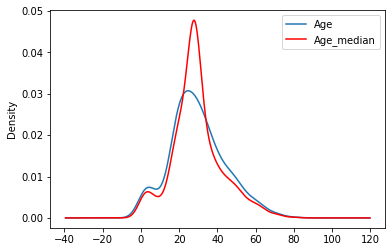

In [45]:
fig=plt.figure()
ax=fig.add_subplot(111)
titanic['Age'].plot(kind='kde',ax=ax)
titanic['Age_median'].plot(kind='kde',ax=ax,color='red')
line,labels=ax.get_legend_handles_labels()
ax.legend(line,labels,loc='best')

### 2)Random Sample Imputation. 
Random sample inputation consist the random observation from the dataset and we use this values to replace the NaN values.

When it hould be used?
It assumes the data is missing completly at random.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
titanic=pd.read_csv("E://Datasets//Miscellaneous//Titanic//train.csv",usecols=['Age','Fare','Survived'])
titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
titanic.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [18]:
### creating a impute fuunction.
def impute_nan(titanic,variable,median):
    titanic[variable+'_median']=titanic[variable].fillna(median)
    titanic[variable+'_random']=titanic[variable]
    ## It will  have a random sample to fill NA values.
    random_sample=titanic[variable].dropna().sample(titanic[variable].isnull().sum(),random_state=0)
    ## Panda nedd to have same index in order to merge the indexes.
    random_sample.index=titanic[titanic[variable].isnull()].index
    titanic.loc[titanic[variable].isnull(),variable+'_random']=random_sample

In [19]:
titanic['Age'].dropna().sample()

622    20.0
Name: Age, dtype: float64

In [24]:
median=titanic.Age.median
median

<bound method Series.median of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [26]:
impute_nan(titanic,'Age',median)

In [27]:
titanic.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22,22.0
1,1,38.0,71.2833,38,38.0
2,1,26.0,7.9250,26,26.0
3,1,35.0,53.1000,35,35.0
4,0,35.0,8.0500,35,35.0


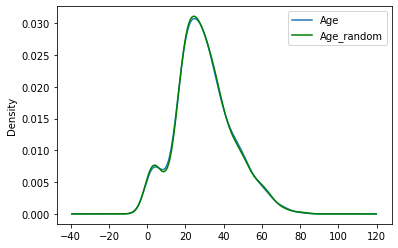

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)
titanic['Age'].plot(kind='kde',ax=ax)
titanic['Age_random'].plot(kind='kde',ax=ax,color='green')
line,labels=ax.get_legend_handles_labels()
ax.legend(line,labels,loc='best')

### 3) Capturing NaN values with new features.
It works well if the data is not missing completly at random.

In [30]:
titanic=pd.read_csv("E://Datasets//Miscellaneous//Titanic//train.csv",usecols=['Age','Fare','Survived'])
titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [31]:
titanic['Age_NaN']=np.where(titanic["Age"].isnull(),1,0)

In [33]:
titanic.head(10)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### End Of Distribution Imputation.

In [34]:
titanic=pd.read_csv("E://Datasets//Miscellaneous//Titanic//train.csv",usecols=['Age','Fare','Survived'])
titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


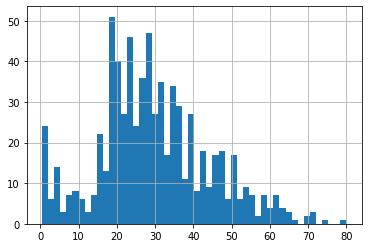

In [35]:
titanic.Age.hist(bins=50)

In [36]:
titanic["Age"].mean()

29.69911764705882

In [39]:
end_dist_val=titanic['Age'].mean()+3*titanic['Age'].std()

In [45]:
### Fillling NaN vales with end of distribtion values.
titanic['EOD_Age']=titanic['Age'].fillna(end_dist_val)
titanic.head(10)

,Survived,Age,Fare,EOD_Age
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,NaN,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


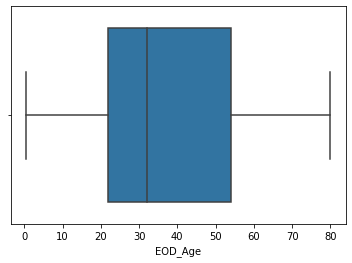

In [49]:
import seaborn as sns
sns.boxplot('EOD_Age',data=titanic)

### 3) Arbitrary Value imputation

It consist of replacing the NaN byy arbitory values.

In [50]:
titanic=pd.read_csv("E://Datasets//Miscellaneous//Titanic//train.csv",usecols=['Age','Fare','Survived'])
titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [53]:
### creating the impute function.
def impute_nan(titanic,variable):
     titanic[variable+'_zeros']=titanic[variable].fillna(0)
     titanic[variable+'_hunderd']=titanic[variable].fillna(100)

In [54]:
impute_nan(titanic,'Age')

In [55]:
titanic.head()

,Survived,Age,Fare,Age_zeros,Age_hunderd
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
